## MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 1.7: Formas de onda básicas (caso discreto)

In [1]:
import math as m
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from IPython.display import Math
from ipywidgets import Dropdown, Label, FloatSlider, IntSlider, Layout, ToggleButton, ToggleButtons, interactive, VBox, HBox, AppLayout

### Formas de onda básicas em $\mathbb{C}^N$:

$E_k$ é o vetor em $\mathbb{C}^N$ que corresponde à amostragem da função

$$\varepsilon_k(t) = e^{i2\pi kt}$$

com $N$ pontos equiespaçados no intervalo $t\in[0,1)$. O intervalo de amostragem é $\Delta_t=\frac{1}{N}$ e o vetor $E_k$ é definido como

$$E_k = \left[\begin{array}{c}e^{i2\pi k\frac{0}{N}}\\ e^{i2\pi k\frac{1}{N}}\\ e^{i2\pi k\frac{2}{N}}\\ \vdots\\ e^{i2\pi k\frac{N-1}{N}}\end{array}\right].$$

In [2]:
N = IntSlider(8, min=1, max=16, step=1, description='N', 
                 continuous_update=False, style={'description_width': 'initial'},
                 layout=Layout(width='50%'))
def pltimage(N):
    w = np.linspace(0,2*np.pi,100)
    circ = np.exp(1j*w)
    plt.figure(figsize=(5, 5))
    plt.title(r'Componentes das formas básicas de onda com N={}'.format(N),fontdict = {'fontsize' : 16})
    plt.plot(circ.real,circ.imag,'b')
    plt.axis('square')
    plt.gca().spines[:].set_position('center')
    plt.tick_params(axis='both',colors='w')
    for i in range(N):
        z = np.exp(1j*2*np.pi*i/N)
        plt.plot(z.real,z.imag,"*r",ms=15)
    z = np.exp(1j*2*np.pi/N)
    plt.annotate("$e^{i2\pi\\frac{1}{N}}$",(z.real+0.1,z.imag),size=20)
    plt.annotate("$e^{-i2\pi\\frac{1}{N}}=e^{i2\pi\ \\frac{N-1}{N}}$",(z.real+0.1,-z.imag-0.1),size=20)
    plt.show()

In [3]:
w = interactive(pltimage, N=N)
w.update()
AppLayout(
    footer=HBox([w.children[0]], layout=Layout(justify_content='center')),
    center=HBox([w.children[1]], layout=Layout(justify_content='center'))
)

AppLayout(children=(HBox(children=(IntSlider(value=8, continuous_update=False, description='N', layout=Layout(…

### Exemplo de formas de onda básicas com $N=4$, para $k=-2,\ldots,4$:

In [4]:
N = 4
ind = range(-2,N+1)
t = np.arange(0,1,1/N)
form = r''
E = [ m.e**(1j*2*m.pi*k*t) for k in range(N)]
for k in ind:
    form += r'E_{{{}}} = \left[\begin{{array}}{{c}}'.format(k)
    for j in range(N):
        if abs(E[k%N][j].real)<1e-12:
            form += r'{0:g}i\\ '.format(E[k%N][j].imag)
        elif abs(E[k%N][j].imag)<1e-12:
            form += r'{0:g}\\ '.format(E[k%N][j].real)
        else:
            form += r'{0:g}+{1:g}\\ '.format(E[k%N][j].real,E[k%N][j].imag)
    form += r'\end{array}\right]\ '

In [5]:
display(Math(form))

<IPython.core.display.Math object>

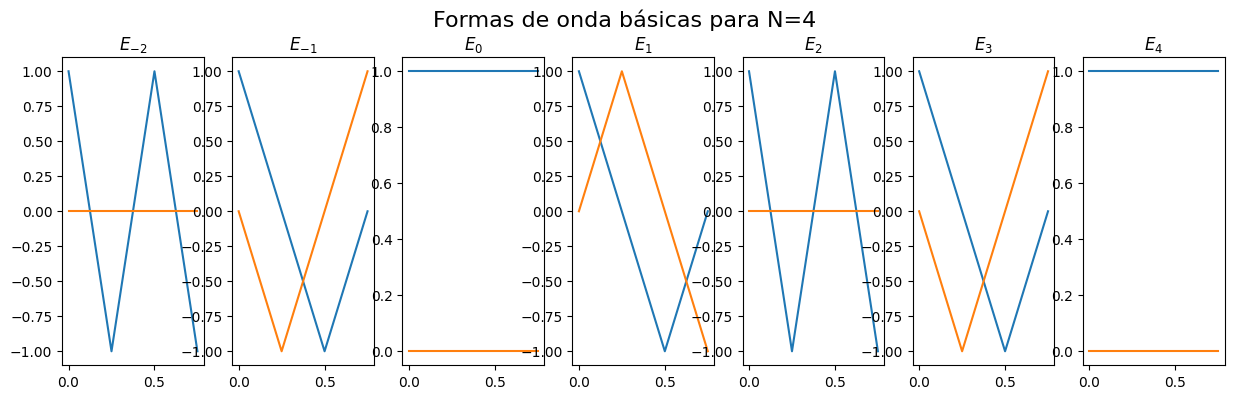

In [6]:
fig, ax = plt.subplots(1, len(ind), figsize=(15, 4))
for i in range(len(ind)):
    k = ind[i]
    ax[i].plot(t, E[k%N].real, t, E[k%N].imag)
    ax[i].set_title(r"$E_{{{}}}$".format(k))
fig.suptitle(r'Formas de onda básicas para N={}'.format(N), fontsize=16, y=1)
plt.show()

In [7]:
fig = plt.figure(figsize=(15, 3))
tt = np.arange(0,1,1/(10*N))
for i in range(len(ind)):
    k = ind[i]%N
    EE = m.e**(1j*2*m.pi*k*tt)
    ax = fig.add_subplot(1, len(ind), i+1, projection='3d')
    ax.plot3D(t,E[k].real,E[k].imag);ax.plot3D(tt,EE.real,EE.imag);ax.plot3D(t,E[k].real,E[k].imag,'*')
    ax.view_init(20,-70);ax.set_ylim3d(-1,1);ax.set_zlim3d(-1,1)
    ax.set_title(r"$E_{{{}}}$".format(ind[i]));ax.set_xlabel('n');ax.set_ylabel('real');ax.set_zlabel('imag')
    fig.tight_layout()
fig.suptitle(r'Visualização das formas de onda básicas com N={} no plano complexo'.format(N), fontsize=16, y=1.1)
plt.show()

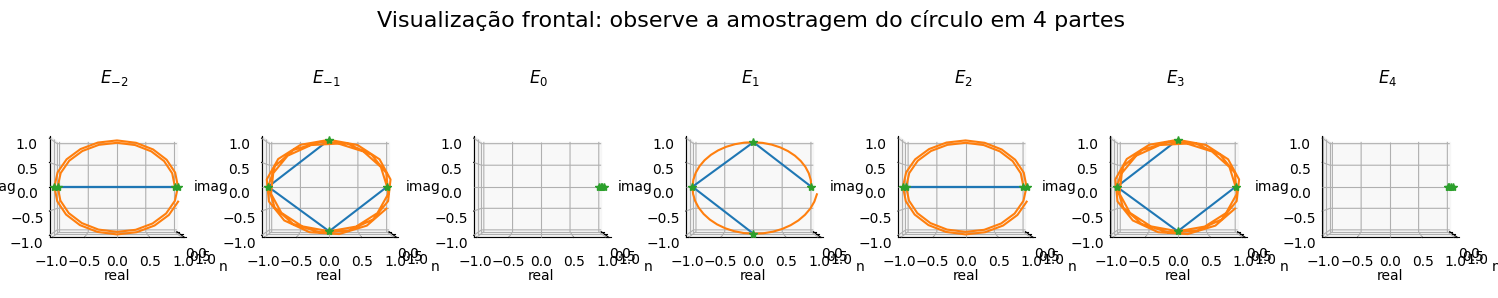

In [8]:
fig = plt.figure(figsize=(15, 3))
tt = np.arange(0,1,1/(10*N))
for i in range(len(ind)):
    k = ind[i]%N
    EE = m.e**(1j*2*m.pi*k*tt)
    ax = fig.add_subplot(1, len(ind), i+1, projection='3d')
    ax.plot3D(t,E[k].real,E[k].imag);ax.plot3D(tt,EE.real,EE.imag);ax.plot3D(t,E[k].real,E[k].imag,'*')
    ax.view_init(0,0);ax.set_ylim3d(-1,1);ax.set_zlim3d(-1,1)
    ax.set_title(r"$E_{{{}}}$".format(ind[i]));ax.set_xlabel('n');ax.set_ylabel('real');ax.set_zlabel('imag')
    fig.tight_layout()
fig.suptitle(r'Visualização frontal: observe a amostragem do círculo em {} partes'.format(N), fontsize=16, y=1.1)
plt.show()

### Relações de rebatimento nas formas de onda básicas

Nos exemplos anteriores ficou evidente a repetição dos vetores $E_k$ a cada $N$ índices, ou seja,

$$E_{k+N} = E_k,\ \forall k\in\mathbb{Z}.$$

Isso é consequência direta da periodicidade das funções exponenciais:

$$\left(E_{k+N}\right)_j = e^{i2\pi(k+N)\frac{j}{N}} = e^{i2\pi k\frac{j}{N}+i2\pi j} = e^{i2\pi k\frac{j}{N}} = \left(E_k\right)_j,\ \forall k,j\in\mathbb{Z}.$$

Observe que a última equação vale também para extensões de cada vetor $E_k$ em relação aos índices $j=0,\ldots,N-1$, ou seja, cada vetor $E_k$ pode ser comprendido como um recorte de um sinal periódico de duração infinita:

$$\left(\cdots, \overbrace{e^{i2\pi k\frac{0}{N}}, e^{i2\pi k\frac{1}{N}}, \cdots, e^{i2\pi k\frac{N-1}{N}}}, \overbrace{e^{i2\pi k\frac{0}{N}}, e^{i2\pi k\frac{1}{N}}, \cdots, e^{i2\pi k\frac{N-1}{N}}}, \cdots \right)$$

Outra relação de rebatimento importante é aquela chamada de *rebatimento conjugado*:

$$\overline{E_k} = E_{N-k},\ \forall k\in\mathbb{Z},$$

cuja verificação é similar à anterior, mas faz uso da propriedade $\overline{e^{ix}}=e^{-ix}$:

$$\left(E_{N-k}\right)_j = e^{i2\pi(N-k)\frac{j}{N}} = e^{i2\pi j-i2\pi k\frac{j}{N}} = e^{-i2\pi k\frac{j}{N}} = \overline{e^{i2\pi k\frac{j}{N}}} = \overline{\left(E_k\right)_j},\ \forall k,j\in\mathbb{Z}.$$

Juntando essa relação com a anterior $\left(E_k=E_{k+N}\right)$ podemos concluir também que:

$$E_{-k} = \overline{E_k},\ \forall k\in\mathbb{Z}.$$

### Formas de onda básicas para imagens (em $\mathbb{C}^{M\times N}$):

$E_{k,l}$ é a matriz em $\mathbb{C}^{M\times N}$ que corresponde à amostragem da função

$$\varepsilon_{kl}(x,y) = e^{i2\pi(kx+ly)}$$

com $M\times N$ pontos equiespaçados no retângulo $(x,y)\in[0,1)\times[0,1)$. Os intervalos de amostragem são $\Delta_x=\frac{1}{M}$ e $\Delta_y=\frac{1}{N}$.

A matriz $E_{k,l}$ é definida como

$$E_{k,l} = \left[\begin{array}{cccc}
e^{i2\pi 0}&e^{i2\pi l\frac{1}{N}}&\cdots&e^{i2\pi l\frac{N-1}{N}}\\
e^{i2\pi k\frac{1}{M}}&e^{i2\pi \left(k\frac{1}{M}+l\frac{1}{N}\right)}&\cdots&e^{i2\pi \left(k\frac{1}{M}+l\frac{N-1}{N}\right)}\\
\vdots&\vdots&\begin{array}{ccc}\ddots&\vdots\\&e^{i2\pi \left(k\frac{i}{M}+l\frac{j}{N}\right)}\\&\vdots&\ddots\end{array}&\vdots\\
e^{i2\pi k\frac{M-1}{M}}&e^{i2\pi\left(k\frac{M-1}{M}+l\frac{1}{N}\right)}&\cdots&e^{i2\pi\left(k\frac{M-1}{M}+l\frac{N-1}{N}\right)}
\end{array}\right].$$

**Observe a indexação em função de $(i,j)$:** a frequência $k$ é associada ao índice $i$ das linhas, enquanto a frequência $l$ é associada ao índice $j$ das colunas. Aqui não é feita aquela "inversão" do sinal do eixo $y$, mas respeita-se sempre a associação entre $k$ e $i$ (ambos entre $0,\ldots,M-1$) e entre $l$ e $j$ (ambos entre $0,\ldots,N-1$).

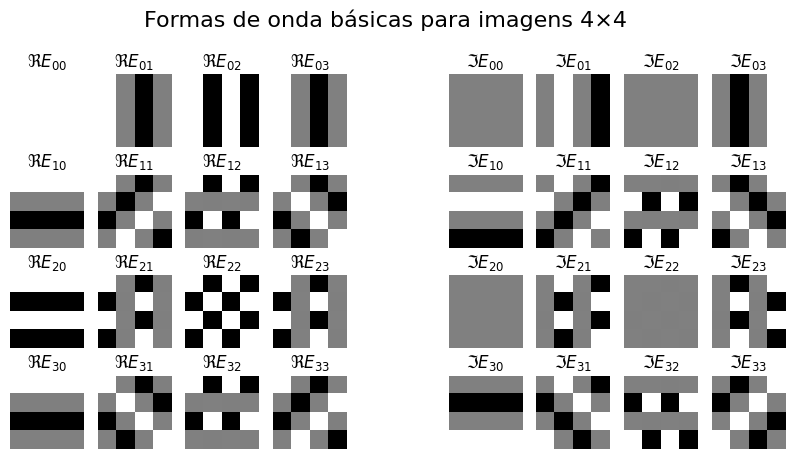

In [9]:
M=4;N=4; fig, ax = plt.subplots(M,2*N+1,figsize=(10,5))
i = np.arange(0,1,1/M); j = np.arange(0,1,1/N); i, j = np.meshgrid(i,j,indexing='ij')
for k in range(M):
  for l in range(N):
    f =  m.e ** (1j * 2 * m.pi * k * i) * m.e ** (1j * 2 * m.pi * l * j)
    ax[k][l].imshow(f.real,cmap='gray',vmin=-1,vmax=+1);ax[k][l].axis("off")
    ax[k][l].set_title(r"$\Re E_{{{}{}}}$".format(k,l))
    ax[k][l+N+1].imshow(f.imag,cmap='gray',vmin=-1,vmax=+1);ax[k][l+N+1].axis("off")
    ax[k][l+N+1].set_title(r"$\Im E_{{{}{}}}$".format(k,l))
  ax[k][N].axis("off")
fig.suptitle(r'Formas de onda básicas para imagens {}×{}'.format(M,N), fontsize=16, y=1)
plt.show()

### Relação entre formas de onda básicas 1D e 2D

$$E_{M,k}\cdot E_{N,l}^T = \left[\begin{array}{c}e^{i2\pi k\frac{0}{M}}\\ e^{i2\pi k\frac{1}{M}}\\ e^{i2\pi k\frac{2}{M}}\\ \vdots\\ e^{i2\pi k\frac{M-1}{M}}\end{array}\right]\left[e^{i2\pi l\frac{0}{N}}\quad e^{i2\pi l\frac{1}{N}}\quad e^{i2\pi l\frac{2}{N}}\quad\cdots\quad e^{i2\pi l\frac{N-1}{N}}\right] = E_{k,l}$$

**Dica da demonstração (exercício 1.17 da lista 1):** expressar formalmente o produto externo acima para mostrar que as duas matrizes são idênticas.

### Relações de rebatimento em imagens

Existem muitas relações de rebatimento observáveis nas imagens acima, cujas demonstrações são parecidas com as dos casos unidimensionais, como por exemplo $\forall k,l$

$$E_{k,l} = E_{l,k}^T \iff \left(E_{k,l}\right)_{i,j}=\left(E_{l,k}\right)_{j,i}, \forall i,j$$

entre muitas outras (veja o exercício 1.21).

### Comentário sobre sintaxe com matrizes em Python

In [10]:
# Exemplos em Python da criação da forma básica de onda E_{k,l} em C^{MxN}
M = 4; N = 8;
k = 2; l = 3;

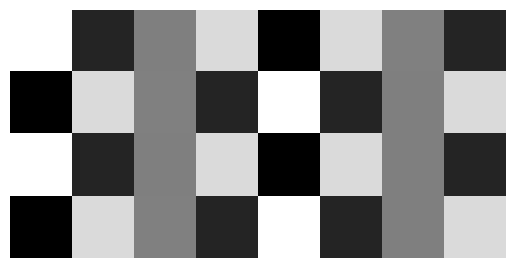

In [11]:
# forma "tradicional" (com laço duplo)
Ekl = np.ndarray((M,N),dtype="complex")
for r in range(M):
    for s in range(N):
        Ekl[r,s] = np.exp(1j*2*m.pi*(k*r/M+l*s/N))
plt.imshow(Ekl.real, cmap='gray');plt.axis('off');plt.show()

r = [[0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3]]
s = [[0 1 2 3 4 5 6 7]
 [0 1 2 3 4 5 6 7]
 [0 1 2 3 4 5 6 7]
 [0 1 2 3 4 5 6 7]]


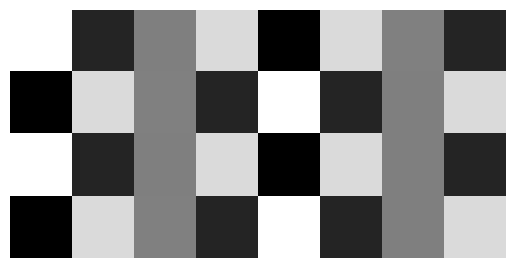

In [12]:
# exemplo usando meshgrid
Ekl = np.ndarray((M,N),dtype="complex")
r,s = np.meshgrid(range(M),range(N),indexing='ij')
print("r =",r);print("s =",s)
Ekl = np.exp(1j*2*m.pi*(k*r/M+l*s/N))
plt.imshow(Ekl.real, cmap='gray');plt.axis('off');plt.show()

r = [[0]
 [1]
 [2]
 [3]]
s =  [0 1 2 3 4 5 6 7]
kr/M = [[0. ]
 [0.5]
 [1. ]
 [1.5]]
ls/N =  [0.    0.375 0.75  1.125 1.5   1.875 2.25  2.625]
r+s =  [[ 0  1  2  3  4  5  6  7]
 [ 1  2  3  4  5  6  7  8]
 [ 2  3  4  5  6  7  8  9]
 [ 3  4  5  6  7  8  9 10]]
r+0s =  [[0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3]]
0r+s =  [[0 1 2 3 4 5 6 7]
 [0 1 2 3 4 5 6 7]
 [0 1 2 3 4 5 6 7]
 [0 1 2 3 4 5 6 7]]
kr/M+ls/N =  [[0.    0.375 0.75  1.125 1.5   1.875 2.25  2.625]
 [0.5   0.875 1.25  1.625 2.    2.375 2.75  3.125]
 [1.    1.375 1.75  2.125 2.5   2.875 3.25  3.625]
 [1.5   1.875 2.25  2.625 3.    3.375 3.75  4.125]]


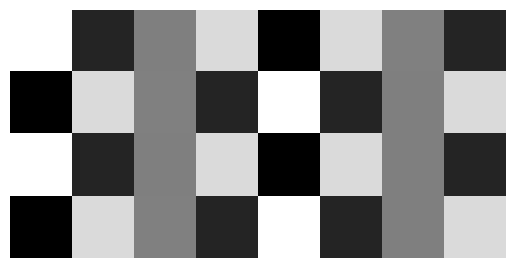

In [13]:
# exemplo usando "broadcast"
Ekl = np.ndarray((M,N),dtype="complex")
r = np.array(range(M)); s = np.array(range(N));
# transpõe r para vetor-coluna:
r = r[:,np.newaxis]
print("r =",r);print("s = ",s)
print("kr/M =",k*r/M);print("ls/N = ",l*s/N)
print("r+s = ",r+s)
print("r+0s = ",r+0*s)
print("0r+s = ",0*r+s)
print("kr/M+ls/N = ",k*r/M+l*s/N)
Ekl = np.exp(1j*2*m.pi*(k*r/M+l*s/N))
plt.imshow(Ekl.real, cmap='gray');plt.axis('off');plt.show()

### Cálculo de produtos internos entre matrizes

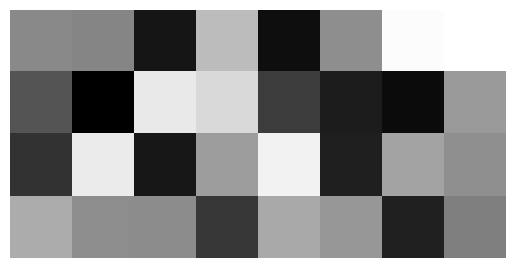

In [14]:
# cria imagem aleatória A
A = np.ndarray((M,N),dtype="double")
for r in range(M):
    for s in range(N):
        A[r,s] = np.random.random()
plt.imshow(A, cmap='gray');plt.axis('off');plt.show()

In [15]:
# calcula produto interno Ahat[k,l] = (A,Ekl)
# maneira tradicional
soma = 0
for r in range(M):
    for s in range(N):
        soma += A[r,s]*np.conjugate(Ekl[r,s])
print(soma)
# usando produto interno
soma = 0
for r in range(M):
    soma += np.inner(A[r],np.conjugate(Ekl[r]))
print(soma)
# maneira "sem laços" (os laços existem, mas estão implícitos)
print(sum(sum(A*np.conjugate(Ekl))))

(-1.0566859183761035-3.022856220347972j)
(-1.0566859183761033-3.022856220347972j)
(-1.0566859183761033-3.022856220347972j)
